In [1]:
import sys, importlib, os
sys.path.append(f'../../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate
from scipy.interpolate import RegularGridInterpolator
import itertools
from modules.loaders.format_data import format_data_general
from modules.loaders.visualize_training_data import animate_training_data
from modules.utils.noise_and_interpolate import noise_and_interpolate

np.set_printoptions(threshold=np.inf)
%matplotlib ipympl

In [4]:
data_path = "/work/users/s/m/smyersn/elston/projects/kinetics_binns/data/2d/random_data.npz"
#data_path = "/work/users/s/m/smyersn/elston/projects/kinetics_binns/data/1d/spikes_data.npz"
npz = np.load(data_path)

dimensions = 2
species = 2
num_points = 500
epsilon = 0

In [5]:
training_data = format_data_general(data_path, dimensions, species)
training_data = noise_and_interpolate(training_data, num_points, epsilon, dimensions, species)

In [6]:
def animate_training_data(training_data, dimensions, species, name=None):
       
    frames = np.unique(training_data[:, dimensions])
    positions = np.unique(training_data[:, 0])
    u_array = np.reshape(training_data[:, dimensions+1], ((len(frames),) + (len(positions),) * dimensions))
    v_array = np.reshape(training_data[:, dimensions+2], ((len(frames),) + (len(positions),) * dimensions))

    if dimensions == 1:
        # Define update function
        def animate(i):
            u_line.set_data(positions, u_array[i, :])
            v_line.set_data(positions, v_array[i, :])
            ax.set_title(f'T = {frames[i]}')
            
        # Plot animation
        fig, ax = plt.subplots()
        ax.set(ylim=(0, 12))
        u_line = ax.plot(positions, u_array[0, :], color='orange', label='Cdc42T')[0]
        v_line = ax.plot(positions, v_array[0, :], color='blue', label='Cdc42D')[0]
        
    if dimensions == 2:
        # Define update function
        def animate(i):
            u_plot.set_array(u_array[i, :, :])
            ax.set_title(f'T = {np.unique(training_data[:, 2])[i]}')

        # Plot animation
        fig, ax = plt.subplots()
        u_plot = ax.imshow(u_array[0, :, :], cmap='viridis')
        u_plot.set_clim(vmin=u_array[:, :, :].min(), vmax=u_array[:, :, :].max())
        cbar = plt.colorbar(u_plot, ax=ax)

    anim = animation.FuncAnimation(fig, animate, frames=range(len(frames)), repeat=True)
    
    if name is not None:
        writergif = animation.PillowWriter(fps=5)
        anim.save(f'{name}.gif', writer=writergif)

    return anim

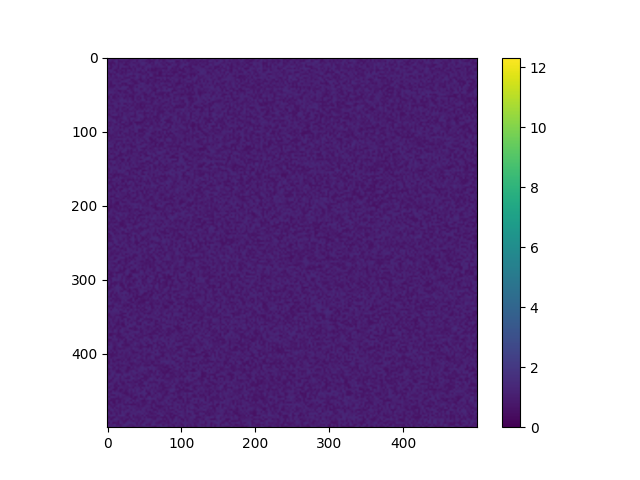

In [7]:
animate_training_data(training_data, dimensions, species)

In [ ]:
def animate_training_data(training_data, dimensions, species, name=None):
       
    frames = np.unique(training_data[:, dimensions])
    positions = np.unique(training_data[:, 0])
    
    species_arrays = []
    
    for i in range(species):
        specie = training_data[:, dimensions+i+1]
        specie_array = np.reshape(specie, ((len(frames),) + (len(positions),) * dimensions))
        species_arrays.append(specie_array)

    if dimensions == 1:
        # Instantiate figure and lines
        fig, ax = plt.subplots()
        ax.set(xlim=(np.min(positions), np.max(positions)), ylim=(0, 12))
        
        lines = [ax.plot([], [])[0] for _ in range(species)]

        # Define initialization function
        def init():
            for line in lines:
                line.set_data([], [])
            return lines
        
        # Define update function
        def animate(frame):
            for i, line in enumerate(ax.get_lines()):
                line.set_data(positions, species_arrays[i][frame, :])
                ax.set_title(f'T = {frames[frame]}')
        
    if dimensions == 2:
        # Instantiate figure
        fig, ax = plt.subplots()
        u_plot = ax.imshow(species_arrays[0][0, :, :], cmap='viridis')
        u_plot.set_clim(vmin=species_arrays[0][:, :, :].min(),
                        vmax=species_arrays[0][:, :, :].max())
        cbar = plt.colorbar(u_plot, ax=ax)
        
        # Define initialization function
        def init():
            return None

        # Define update function
        def animate(frame):
            u_plot.set_array(species_arrays[0][frame, :, :])
            ax.set_title(f'T = {frames[frame]}')
        
    # Create animation
    anim = animation.FuncAnimation(fig, animate, frames=range(len(frames)), init_func=init, repeat=True)
    
    if name is not None:
        writergif = animation.PillowWriter(fps=5)
        anim.save(f'{name}.gif', writer=writergif)

    return anim

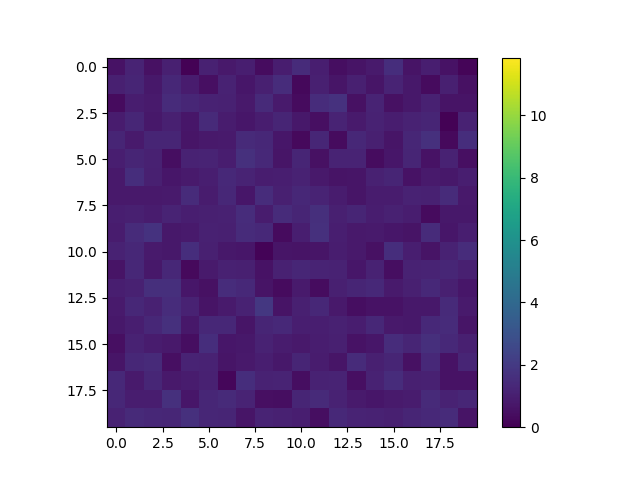

array: [1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246
 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246
 1.0246 1.0246 1.0246 1.0246 1.0246]
array: [1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246
 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246 1.0246
 1.0246 1.0246 1.0246 1.0246 1.0246]
Line2D(_child0)
array: [0.9        0.90339514 0.91334681 0.92917965 0.94981928 0.97386539
 0.99968585 1.0255272  1.04963593 1.07037607 1.08633904 1.09644034
 1.09999605 1.09676494 1.08696621 1.07126323 1.05072286 1.02674013
 1.00094245 0.97508038 0.95091016 0.93007238 0.9139808  0.90372736
 0.9000079 ]
Line2D(_child0)
array: [0.9        0.90339514 0.91334681 0.92917965 0.94981928 0.97386539
 0.99968585 1.0255272  1.04963593 1.07037607 1.08633904 1.09644034
 1.09999605 1.09676494 1.08696621 1.07126323 1.05072286 1.02674013
 1.00094245 0.97508038 0.95091016 0.93007238 0.9139808  0.90372736
 0.9000079 ]
Line2D(_child1)
arra

In [ ]:
animate_training_data(training_data, dimensions, species)